<a href="https://colab.research.google.com/github/javieribanez17/PrediccionDeMuertesPorECV/blob/main/FinalProject_AI_JavierI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto final IA**
# *Predicción de muertes por insuficiencia cardíaca*
**Estudiante: Javier Alberto Ibáñez Bolaños**  

## Llamado de librerias 

In [1]:
import pandas as pd #Principal
import numpy as np #Principal
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data visualization
from sklearn.model_selection import train_test_split #División de datos
from sklearn.preprocessing import StandardScaler #Normalización
from sklearn.decomposition import PCA #Analisis por componentes principales
from sklearn.linear_model import LogisticRegression #Regresión Logistica
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive Bayes 
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.metrics import roc_curve,roc_auc_score, f1_score, matthews_corrcoef #Metricas de evaluación
from sklearn.metrics import confusion_matrix, accuracy_score #Metricas de evaluación
from sklearn import metrics, tree #Metricas y diagrama

## Preprocesamiento de los datos 

In [2]:
#################################################LIMPIEZA##############################################################################
datos = pd.read_csv('heart_failure_clinical_records_dataset.csv') #Lectura del dataset
print('La dimensión del dataset es:',datos.shape) # Dimensionalidad del DataFrame
print(datos.info()) #Función de verificación
print('Age es de tipo',datos.dtypes['age'],'por el dato:',datos.at[188,'age'],'en la fila 188 del dataset') #Dato no necesario en age
datos['age']=datos['age'].astype(int) #Conversión del tipo de dato de age
print('El tipo de dato de age ahora es:',datos.dtypes['age'])
datos.to_csv ('heart_failure_clinical_clean.csv', index = False) #Creación de un nuevo csv limpio
datas = pd.read_csv('heart_failure_clinical_clean.csv') #Lectura del dataset limpio

La dimensión del dataset es: (299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
m

La persona con mayor edad tiene: 95 años, la menor tiene: 40 años y el promedio es de: 60.83 años

El número de eventos de muerte es de: 96 

El número de personas con anemia es de: 129 

El número de personas con diabetes es de: 125 

El número de personas con presión arterial alta es de: 105 

El número de personas que fuman es de: 96 

El número de hombres son: 194 y de mujeres son: 105 

El timepo promedio de seguimiento es: 130.3 días

La correlación de todo el conjunto de datos es:



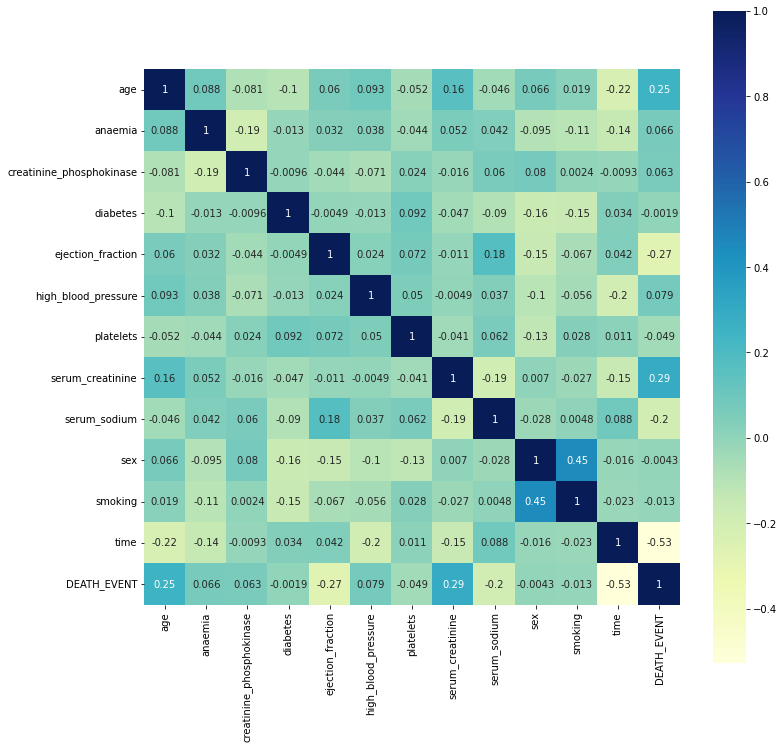

In [3]:
#Datos extraidos del dataset
print("La persona con mayor edad tiene:",datas['age'].max(),"años, la menor tiene:",(datas['age'].min()),"años y el promedio es de:",round(datas['age'].mean(),2),"años\n")
print("El número de eventos de muerte es de:",datas['DEATH_EVENT'].value_counts()[1],"\n")
print("El número de personas con anemia es de:",datas['anaemia'].value_counts()[1],"\n")
print("El número de personas con diabetes es de:",datas['diabetes'].value_counts()[1],"\n")
print("El número de personas con presión arterial alta es de:",datas['high_blood_pressure'].value_counts()[1],"\n")
print("El número de personas que fuman es de:",datas['smoking'].value_counts()[1],"\n")
print("El número de hombres son:",datas['sex'].value_counts()[1],"y de mujeres son:",datas['sex'].value_counts()[0],"\n")
print("El timepo promedio de seguimiento es:",round(datas['time'].mean(),1),"días\n")
# Correlación en el conjunto de datos
print("La correlación de todo el conjunto de datos es:\n")
plt.figure(figsize=(12,12)) #Dimensión de la gráfica
sns.heatmap(data=datas.corr(), square=True, annot=True, cmap="YlGnBu"); # Correlación

In [4]:
###################################################SPLIT Y NORMALIZACIÓN###############################################################
Xn = datas.drop(['DEATH_EVENT',], axis=1) #Conjunto de caracteristicas
Yn = pd.DataFrame(datas['DEATH_EVENT']) #Conjunto de etiquetas
X_train, X_test, Y_train, Y_test = train_test_split(Xn, Yn,test_size=0.25, random_state=101) #División de training y test en los datos 80-20
scaler = StandardScaler() #Escalización de los conjuntos
scaler.fit(X_train) #Saca la media y la desviacion estandar del conjunto de entrenamiento
X_train = scaler.transform(X_train) #Uso esa media y sdev para escalizar el entrenamiento
X_test = scaler.transform(X_test) #Uso esa media y sdev para escalizar el testeo

In [6]:
########################################################---PCA---#######################################################################
pca = PCA(n_components=12) #Selección del número de componentes
pca.fit(X_train) #Ajuste de los datos de entrenamiento
Variance_r = pca.explained_variance_ratio_ #Varianza de cada caracteristica
X_pca = pca.transform(X_train) #Nueva selección de datos de entrenamiento
X_pca_test = pca.transform(X_test) #Nueva selección de datos de prueba
print("La varianza de cada caracteristica es:",Variance_r) #Varianza de cada caracteristica
print('La varianza resultante es:',sum(Variance_r[0:12])) #Varianza resultante

La varianza de cada caracteristica es: [0.142821   0.12390005 0.10281431 0.09887176 0.08705742 0.0796942
 0.07711287 0.07259395 0.06296752 0.0567895  0.05217495 0.04320247]
La varianza resultante es: 1.0000000000000002


## **Modelos de aprendizaje** 

## *Regresión Logistica sin PCA*  

In [7]:
######################################################---LOGISTIC REGRESSION---###########################################################
L_regression = LogisticRegression(random_state=0, penalty='l2' , solver='lbfgs', max_iter=100000) #Regresión logistica
L_regression.fit(X_train, Y_train) #Ajuste al conjunto de entrenamiento
Ytrain_pre= L_regression.predict(X_train) #Predicción de la regresión en el entrenamiento
Ytest_pre= L_regression.predict(X_test) #Predicción de la regresión en el test
Ytest_scores = L_regression.predict_proba(X_test) #Probabilidad de la predicción
MCC_train = matthews_corrcoef(Y_train, Ytrain_pre) #Coeficiente de matthews
MCC_test = matthews_corrcoef(Y_test, Ytest_pre) #Coeficiente de matthews
ACC = accuracy_score(Y_test, Ytest_pre) #Precisión
F1_score = metrics.f1_score(Y_test,Ytest_pre)
Roc_auc = roc_auc_score(Y_test, Ytest_scores[:,1]) #AUC-ROC
print("El MCC obtenido de la regresión logistica es de:",MCC_test,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("El Accuary obtenido de la regresión logistica es de:",ACC,"\n")  #Predicciones del conjunto de entrenamiento
print("El F1score obtenido de la regresión logistica es de:",F1_score,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("El Roc_auc obtenido de la regresión logistica es de:",Roc_auc,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("La matriz de confusión obtenido de la regresión logistica es:\n", confusion_matrix(Y_test, Ytest_pre)) #Matriz de confusión

El MCC obtenido de la regresión logistica es de: 0.6590909090909091 

El Accuary obtenido de la regresión logistica es de: 0.8666666666666667 

El F1score obtenido de la regresión logistica es de: 0.75 

El Roc_auc obtenido de la regresión logistica es de: 0.8990909090909089 

La matriz de confusión obtenido de la regresión logistica es:
 [[50  5]
 [ 5 15]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## *Regresión Logistica con PCA*

In [8]:
  ######################################################---LOGISTIC REGRESSION---###########################################################
L_regression = LogisticRegression(random_state=0, penalty='l2' , solver='lbfgs', max_iter=100000) #Regresión logistica
L_regression.fit(X_pca, Y_train) #Ajuste al conjunto de entrenamiento
Ytrain_pre_PCA= L_regression.predict(X_pca) #Predicción de la regresión en el entrenamiento
Ytest_pre_PCA= L_regression.predict(X_pca_test) #Predicción de la regresión en el test
Ytest_scores_PCA = L_regression.predict_proba(X_pca_test) #Probabilidad de la predicción
MCC_train = matthews_corrcoef(Y_train, Ytrain_pre_PCA) #Coeficiente de matthews
MCC_test = matthews_corrcoef(Y_test, Ytest_pre_PCA) #Coeficiente de matthews
ACC = accuracy_score(Y_test, Ytest_pre_PCA) #Precisión
F1_score = metrics.f1_score(Y_test,Ytest_pre_PCA)
Roc_auc = roc_auc_score(Y_test, Ytest_scores_PCA[:,1]) #AUC-ROC
print("El MCC obtenido de la regresión logistica con PCA es de:",MCC_test,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("El Accuary obtenido de la regresión logistica con PCA es de:",ACC,"\n")  #Predicciones del conjunto de entrenamiento
print("El F1score obtenido de la regresión logistica con PCA es de:",F1_score,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("El Roc_auc obtenido de la regresión logistica con PCA es de:",Roc_auc,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("La matriz de confusión obtenido de la regresión logistica con PCA es:\n", confusion_matrix(Y_test, Ytest_pre)) #Matriz de confusión

El MCC obtenido de la regresión logistica con PCA es de: 0.6590909090909091 

El Accuary obtenido de la regresión logistica con PCA es de: 0.8666666666666667 

El F1score obtenido de la regresión logistica con PCA es de: 0.75 

El Roc_auc obtenido de la regresión logistica con PCA es de: 0.8990909090909089 

La matriz de confusión obtenido de la regresión logistica con PCA es:
 [[50  5]
 [ 5 15]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## *KNN*  

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

El k ideal es: 22 

El MCC obtenido del KNN es: 0.377871090803229 

El Accuary obtenido del KNN es: 0.7866666666666666 

El F1score obtenido del KNN es: 0.3846153846153846 

El Roc_auc obtenido del KNN es: 0.8604545454545455 

La matriz de confusión obtenido del KNN es:
 [[54  1]
 [15  5]]
Coeficiente de silueta pra hallar K


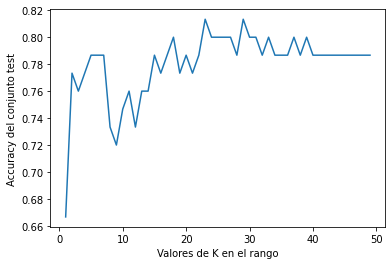

In [9]:
########################################################---KNN---#######################################################################
k_range = range(1, 50) #El k da idual con un rango de 100
distance='minkowski' #Tipo de distancia
scores_list=[] #Lista de metrica
for k in k_range:
  knn = KNeighborsClassifier(k,weights='uniform',metric=distance, metric_params=None,algorithm='brute') #Clasificador KNN
  knn.fit(X_train, Y_train) #Ajuste al conjunto de datos
  Y_prknn = knn.predict(X_test) #Predicción del modelo
  scores_list.append(metrics.accuracy_score(Y_test,Y_prknn)) #Precisión por predicción
plt.plot(k_range,scores_list)
plt.xlabel('Valores de K en el rango')
plt.ylabel('Accuracy del conjunto test')
max_accuary = max(scores_list) #Maxima precisión como en coeficiente de sileuta
k_ideal = scores_list.index(max_accuary) #Valor de K según el accuary
print("El k ideal es:",k_ideal,"\n") #Imprime el valor de K
knn = KNeighborsClassifier(k_ideal,weights='uniform',metric=distance, metric_params=None,algorithm='brute') #Clasificador KNN
knn.fit(X_train, Y_train) #Ajuste al dataset
Ytrain_prek= knn.predict(X_train) #Predicción de la regresión del entrenamiento
Ytest_prek= knn.predict(X_test) #Predicción de la regresión en el test
Ytest_scoresk = knn.predict_proba(X_test) #Probabilidad de la predicción
MCCk_train = matthews_corrcoef(Y_train, Ytrain_prek) #Coeficiente de matthews de training
MCCk_test = matthews_corrcoef(Y_test, Ytest_prek) #Coeficiente de matthews
F1k_score = metrics.f1_score(Y_test,Ytest_prek) #F1 score
ACCk = accuracy_score(Y_test, Ytest_prek) #Precisión
Roc_auck = roc_auc_score(Y_test, Ytest_scoresk[:,1]) #AUC-ROC
print("El MCC obtenido del KNN es:",MCCk_test,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("El Accuary obtenido del KNN es:",ACCk,"\n")  #Predicciones del conjunto de entrenamiento
print("El F1score obtenido del KNN es:",F1k_score,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("El Roc_auc obtenido del KNN es:",Roc_auck,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("La matriz de confusión obtenido del KNN es:\n", confusion_matrix(Y_test, Ytest_prek)) #Matriz de confusión
print("Coeficiente de silueta pra hallar K") 

## *Naive Bayes*  

In [10]:
########################################################---NAIVE BAYES---#################################################################
classifier = GaussianNB() #Clasifificador
classifier.fit(X_train, Y_train) #Ajuste al dataset
Ytrain_preNB = classifier.predict(X_train) #Predicción de la regresión del entrenamiento
Ytest_preNB = classifier.predict(X_test) #Predicción de la regresión en el test
MCCNB_train = matthews_corrcoef(Y_train, Ytrain_preNB) #Coeficiente de matthews
MCCNB_test = matthews_corrcoef(Y_test, Ytest_preNB) #Coeficiente de matthews
F1NB_score = metrics.f1_score(Y_test,Ytest_preNB)
ACCNB = accuracy_score(Y_test, Ytest_preNB) #Precisión
Roc_aucNB = roc_auc_score(Y_test, Ytest_preNB) #AUC-ROC
print("El MCC obtenido del KNN es:",MCCNB_test,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("El Accuary obtenido del KNN es:",ACCNB,"\n")  #Predicciones del conjunto de entrenamiento
print("El F1score obtenido del KNN es:",F1_score,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("El Roc_auc obtenido del KNN es:",Roc_aucNB,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("La matriz de confusión obtenido de Naive bayes es:\n", confusion_matrix(Y_test, Ytest_preNB)) #Matriz de confusión

El MCC obtenido del KNN es: 0.5276448530110863 

El Accuary obtenido del KNN es: 0.8266666666666667 

El F1score obtenido del KNN es: 0.75 

El Roc_auc obtenido del KNN es: 0.7386363636363636 

La matriz de confusión obtenido de Naive bayes es:
 [[51  4]
 [ 9 11]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## *Decision Tree*  

La profundida optima para Decision Tree es: 2 

El MCC obtenido del Decision Tree es: 0.681747491571791 

El Accuary obtenido del Decision Tree es: 0.88 

El F1score obtenido del Decision Tree es: 0.75 

El Roc_auc obtenido del Decision Tree es: 0.8227272727272726 

La matriz de confusión obtenido de Naive bayes es:
 [[52  3]
 [ 6 14]]
El árbol de decisión resultante es:


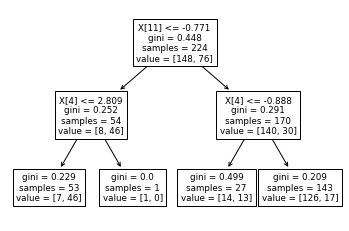

In [11]:
########################################################---DECISION TREE---###############################################################
MCC_metric=[] #Lista de MCC
index_maxMCC=[]
for d in range(50):
  decision_tree = DecisionTreeClassifier(random_state=0, max_depth=d+1) #Arbol de decisión
  decision_tree.fit(X_train, Y_train) #Ajuste del dataset
  Y_pred_tree=decision_tree.predict(X_test) #Predicción del modelo
  MCC_metric.append(matthews_corrcoef(Y_test,Y_pred_tree)) #Calculo de MCC
  index_maxMCC.append(d) #Cuenta de la indexación
maximo_MCC = MCC_metric.index(max(MCC_metric)) #Maximo valor de MCC y su posición
myTree = DecisionTreeClassifier(random_state=0, max_depth=maximo_MCC) #Arbol implementado
myTree = myTree.fit(X_train, Y_train) #Ajuste del dataset
Y_test_predict_T = myTree.predict(X_test) #Predicción del modelo
MCCNB_test = matthews_corrcoef(Y_test, Y_test_predict_T) #Coeficiente de matthews
F1NB_score = metrics.f1_score(Y_test,Y_test_predict_T)
ACCNB = accuracy_score(Y_test, Y_test_predict_T) #Precisión
Roc_aucNB = roc_auc_score(Y_test, Y_test_predict_T) #AUC-ROC
print("La profundida optima para Decision Tree es:",maximo_MCC,"\n")
print("El MCC obtenido del Decision Tree es:",MCCNB_test,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("El Accuary obtenido del Decision Tree es:",ACCNB,"\n")  #Predicciones del conjunto de entrenamiento
print("El F1score obtenido del Decision Tree es:",F1_score,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("El Roc_auc obtenido del Decision Tree es:",Roc_aucNB,"\n")  #Predicciones del conjunto de prueba elejido del archivo train
print("La matriz de confusión obtenido de Naive bayes es:\n", confusion_matrix(Y_test, Y_test_predict_T)) #Matriz de confusión
print("El árbol de decisión resultante es:")
tree.plot_tree(myTree); #Gráfica del árbol